#Implement classification using Multilayer perceptron using Iris dataset


#Import necessary libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load and preprocess the Iris dataset

In [5]:
data = load_iris()
X = data.data
y = data.target

In [6]:
#data split into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
#Standardizes the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#Converts the NumPy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)

# Define the MLP model

In [8]:
#Defines a custom neural network class
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Set model parameters and training hyperparameters

In [9]:
#Sets the input, hidden, and output dimensions for the neural network model
input_dim = X_train.shape[1]
hidden_dim = 64
output_dim = len(torch.unique(y_train))

#Sets the learning rate for the optimizer and the number of training epochs
learning_rate = 0.01
epochs = 100

# Initialize the model, loss function, and optimizer

In [10]:
model = MLP(input_dim, hidden_dim, output_dim)

In [11]:
#Defines the loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training the model

Trains the neural network model through a loop of specified epochs. It calculates predictions, loss, performs backpropagation, and updates the model's parameters using stochastic gradient descent (SGD)

In [12]:
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 1.0355
Epoch [20/100], Loss: 0.9087
Epoch [30/100], Loss: 0.8161
Epoch [40/100], Loss: 0.7458
Epoch [50/100], Loss: 0.6908
Epoch [60/100], Loss: 0.6468
Epoch [70/100], Loss: 0.6107
Epoch [80/100], Loss: 0.5806
Epoch [90/100], Loss: 0.5551
Epoch [100/100], Loss: 0.5332


# Evaluate the model on test data

In [13]:
from sklearn.metrics import classification_report

In [14]:
#Evaluates the trained model
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    _, predicted = torch.max(y_pred, 1)

    accuracy = accuracy_score(y_test, predicted.numpy())
    print(f'Accuracy on test data: {accuracy:.2f}')
    accuracy_percent=round(accuracy,2)
    print("Accuracy is:",accuracy_percent*100,"%")

    # Generate the classification report
    report = classification_report(y_test, predicted.numpy())
    print("Classification Report:\n", report)

Accuracy on test data: 0.90
Accuracy is: 90.0 %
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.67      0.80         9
           2       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30



#Classification Report


In [15]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Plot F1-Scores by Class
classification_report_str = """
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.44      0.62         9
           2       0.69      1.00      0.81        11

    accuracy                           0.83        30
   macro avg       0.90      0.81      0.81        30
weighted avg       0.89      0.83      0.82        30
"""

In [17]:
lines = classification_report_str.strip().split('\n')
class_names = [line.split()[0] for line in lines[2:-5]]  # Extract class names
f1_scores = [float(line.split()[3]) for line in lines[2:-5]]

# Plot Scatter Plot of Iris Dataset

C:\Users\Owner\AppData\Local\Temp\ipykernel_3164\413812282.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f1_scores, y=class_names, palette='viridis')


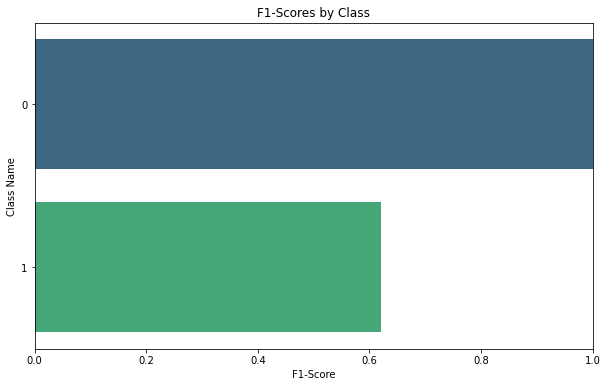

In [18]:
#Creates a bar plot visualizing
plt.figure(figsize=(10, 6))
sns.barplot(x=f1_scores, y=class_names, palette='viridis')
plt.xlabel('F1-Score')
plt.ylabel('Class Name')
plt.title('F1-Scores by Class')
plt.xlim(0, 1)  # Adjust the x-axis limits if necessary
plt.show()

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [20]:
data = load_iris()
X = data.data
y = data.target

In [21]:
feature1 = 0  # Index of the first feature (change as needed)
feature2 = 1

In [22]:
class_labels = ['Class 0', 'Class 1', 'Class 2']
colors = ['blue', 'red', 'green']

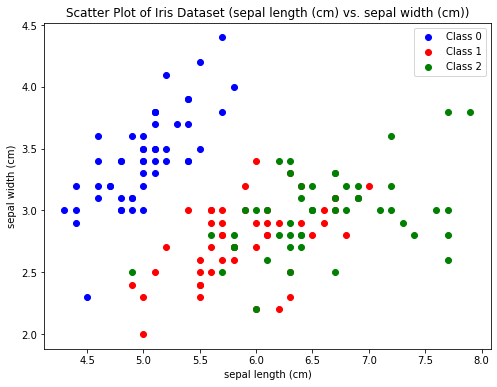

In [23]:
#: Visualizes a scatter plot using the first two features of the Iris dataset
plt.figure(figsize=(8, 6))

for i in range(len(class_labels)):
    plt.scatter(X[y == i, feature1], X[y == i, feature2], label=class_labels[i], c=colors[i], marker='o')

plt.xlabel(data.feature_names[feature1])
plt.ylabel(data.feature_names[feature2])
plt.title(f'Scatter Plot of Iris Dataset ({data.feature_names[feature1]} vs. {data.feature_names[feature2]})')
plt.legend()
plt.show()